<a href="https://colab.research.google.com/github/Alex-Bernal27/Colab/blob/main/T_sne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import cv2

import tensorflow as tf
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Descargar los datos desde Google Drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fruit_data.csv')

In [ ]:
train_Un = np.array([data.loc[i] for i in data.index if data.loc[i, 'Kind'] == 'Unsupervised'])

mypath='/content/drive/MyDrive/Colab Notebooks/Data Parcial 3'
trainUn_images = np.empty(shape=(len(train_Un), 100, 100, 3),dtype=int)
for n in range(0, len(train_Un)):
  trainUn_images[n] = cv2.imread(join(mypath,train_Un[n][0]))

trainUn_images = trainUn_images[:,:,:,0]
x_train = trainUn_images.astype('float32') 
x_train = trainUn_images/255.0
X_train = x_train.reshape(len(x_train),-1)

In [ ]:
digits_proj = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=700).fit_transform(X_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 766 samples in 0.433s...
[t-SNE] Computed neighbors for 766 samples in 10.516s...
[t-SNE] Computed conditional probabilities for sample 766 / 766
[t-SNE] Mean sigma: 9.235830
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.284012
[t-SNE] KL divergence after 700 iterations: 0.275197


In [ ]:
#función que se utiliza para mostrar el conjunto de datos transformado.
def scatter(x):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    return f, ax, sc

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7ff82abe2e50>)

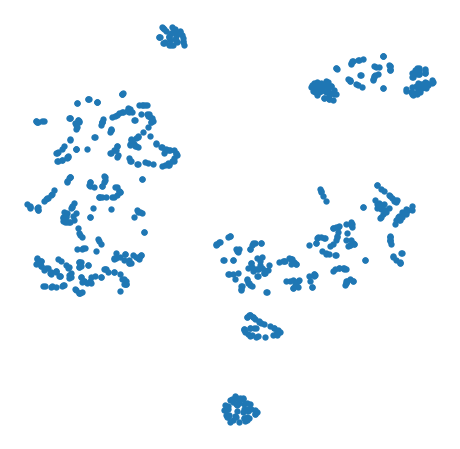

In [ ]:
scatter(digits_proj)